# Homework01

2024120403 홍서이

In [104]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D


In [105]:

df_a = pd.DataFrame({"sample":['A', 'B', 'C', 'D'],
                     "height":[165, 170, 175, 180],
                     "foot_size":[230, 240, 250, 260],
                     "age":[20, 21, 22, 23]

})

df_a

,sample,height,foot_size,age
0,A,165,230,20
1,B,170,240,21
2,C,175,250,22
3,D,180,260,23


In [106]:
df_b = pd.DataFrame({"sample":['E', 'F', 'G', 'H'],
                     "height":[150, 180, 190, 200],
                     "foot_size":[220, 235, 280, 300],
                     "age":[22, 25, 27, 28]

})

df_b

,sample,height,foot_size,age
0,E,150,220,22
1,F,180,235,25
2,G,190,280,27
3,H,200,300,28


1. Please plot (3D) the multivariate Gaussian distribution that models Height and Foot size of
A group. (Do the same for group B.)

In [107]:
# 각 값 별 평균, 분산 계산
## group A mean
mu_a_height = np.mean(df_a['height'])
mu_a_footsize = np.mean(df_a['foot_size'])
mu_a_age = np.mean(df_a['age'])

## group A variance
var_a_height = np.var(df_a['height'])
var_a_footsize = np.var(df_a['foot_size'])
var_a_age = np.var(df_a['age'])

## group A covariance
height_diff = [x_i - mu_a_height for x_i in df_a['height']]
footsize_diff = [x_i - mu_a_footsize for x_i in df_a['foot_size']]
cov_a = sum([x_i * y_i for x_i, y_i in zip(height_diff, footsize_diff)]) / len(height_diff)

## group B mean
mu_b_height = np.mean(df_b['height'])
mu_b_footsize = np.mean(df_b['foot_size'])
mu_b_age = np.mean(df_b['age'])

## group B variance
var_b_height = np.var(df_b['height'])
var_b_footsize = np.var(df_b['foot_size'])
var_b_age = np.var(df_b['age'])

## gropu B covariance
height_diff = [x_i - mu_a_height for x_i in df_b['height']]
footsize_diff = [x_i - mu_a_footsize for x_i in df_b['foot_size']]
cov_b = sum([x_i * y_i for x_i, y_i in zip(height_diff, footsize_diff)]) / len(height_diff)


In [108]:
print("##################그룹 A ############")
print(f'height 평균:{mu_a_height}, foot size 평균:{mu_a_footsize}')
print(f'height 분산:{var_a_height}, footsize 분산:{var_a_footsize}')
print(f'두 변수의 공분산: {cov_a}')

print()

print("##################그룹 B ############")
print(f'height 평균:{mu_b_height}, foot size 평균:{mu_b_footsize}')
print(f'height 분산:{var_b_height}, footsize 분산:{var_b_footsize}')
print(f'두 변수의 공분산:{cov_b}')



##################그룹 A ############
height 평균:172.5, foot size 평균:245.0
height 분산:31.25, footsize 분산:125.0
두 변수의 공분산: 62.5

##################그룹 B ############
height 평균:180.0, foot size 평균:258.75
height 분산:350.0, footsize 분산:1054.6875
두 변수의 공분산:653.125


In [110]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# define parameters for x and y distributions
mu_x = mu_a_height  # mean of x
variance_x = var_a_height  # variance of x

mu_y = mu_a_footsize # mean of y
variance_y = var_a_footsize  # variance of y

# define a grid for x and y values
x = np.linspace(-100, 100, 500)  # generate 500 points between -10 and 10 for x
y = np.linspace(-100, 100, 500)  # generate 500 points between -10 and 10 for y
X, Y = np.meshgrid(x, y)  # create a grid for (x,y) pairs

# create an empty array of the same shape as X to hold the (x, y) coordinates
pos = np.empty(X.shape + (2,))

# fill the pos array with the x and y coordinates
pos[:, :, 0] = X  
pos[:, :, 1] = Y  

# create a multivariate normal distribution using the defined parameters
rv = multivariate_normal([mu_x, mu_y], [[variance_x, cov_a], [cov_a, variance_y]])

# create a new figure for 3D plot
fig = plt.figure()

# add a 3D subplot to the figure
ax = fig.add_subplot(projection='3d')

# create a 3D surface plot of the multivariate normal distribution
ax.plot_surface(X, Y, rv.pdf(pos), cmap='viridis', linewidth=0)

# set labels for the axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# display the 3D plot
plt.show()

LinAlgError: When `allow_singular is False`, the input matrix must be symmetric positive definite.

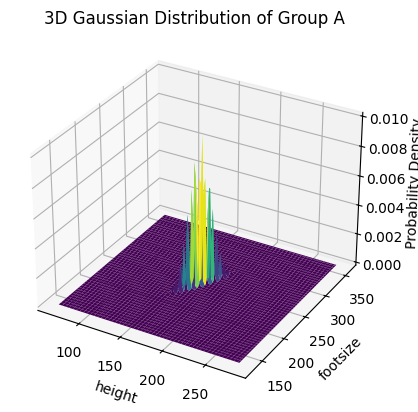

In [115]:
# group B의 gaussian distribution

x = np.array([165, 170, 175, 180])
y = np.array([230, 245, 250, 260])
z = np.array([20, 21, 22, 23])

mean = np.mean([x, y], axis=1)
covariance_matrix = np.cov([x, y])

x_range = np.linspace(min(x)-100, max(x)+100, 100)
y_range = np.linspace(min(y)-100, max(y)+100, 100)
X, Y = np.meshgrid(x_range, y_range)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = np.exp(-0.5 * (np.dot(np.dot((pos[i, j] - mean), np.linalg.inv(covariance_matrix)), (pos[i, j] - mean).T))) / (2 * np.pi * np.sqrt(np.linalg.det(covariance_matrix)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('height')
ax.set_ylabel('footsize')
ax.set_zlabel('Probability Density')
ax.set_title('3D Gaussian Distribution of Group A')

plt.show()


2. When modeling the Gaussian distribution through all the features of Group A and Group
B, calculate which group you have a higher probability of belonging to. Please present the
results without using a library

In [109]:
# group B의 gaussian distribution

x = np.array([165, 170, 175, 180])
y = np.array([230, 240, 250, 260])

mean = np.mean([x, y], axis=1)
covariance_matrix = np.cov([x, y])
print(covariance_matrix)

x_range = np.linspace(min(x)-100, max(x)+100, 100)
y_range = np.linspace(min(y)-100, max(y)+100, 100)
X, Y = np.meshgrid(x_range, y_range)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = np.exp(-0.5 * (np.dot(np.dot((pos[i, j] - mean), np.linalg.inv(covariance_matrix)), (pos[i, j] - mean).T))) / (2 * np.pi * np.sqrt(np.linalg.det(covariance_matrix)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('height')
ax.set_ylabel('footsize')
ax.set_zlabel('Probability Density')
ax.set_title('3D Gaussian Distribution of Group B')

plt.show()


[[ 41.66666667  83.33333333]
 [ 83.33333333 166.66666667]]


LinAlgError: Singular matrix

In [103]:
print("##################그룹 A ############")
print(f'height 평균:{mu_a_height}, foot size 평균:{mu_a_footsize} age의 평균:{mu_a_age}')
print(f'height 분산:{var_a_height}, footsize 분산:{var_a_footsize}, age의 분산{var_a_age}')

print()

print("##################그룹 B ############")
print(f'height 평균:{mu_b_height}, foot size 평균:{mu_b_footsize}, age의 평균:{mu_b_age}')
print(f'height 분산:{var_b_height}, footsize 분산:{var_b_footsize}, age 분산:{var_b_age}')



##################그룹 A ############
height 평균:172.5, foot size 평균:245.0 age의 평균:21.5
height 분산:31.25, footsize 분산:125.0, age의 분산1.25
두 변수의 공분산: 62.5

##################그룹 B ############
height 평균:180.0, foot size 평균:258.75, age의 평균:25.5
height 분산:350.0, footsize 분산:1054.6875, age 분산:5.25
두 변수의 공분산:653.125


In [119]:
import numpy as np

# 데이터
x = np.array([165, 170, 175, 180])
y = np.array([230, 245, 250, 260])
z = np.array([20, 21, 22, 23])

# 1. 평균 계산
mean_x = np.mean(x)
mean_y = np.mean(y)
mean_z = np.mean(z)

# 2. 분산 계산
var_x = np.var(x)
var_y = np.var(y)
var_z = np.var(z)

# 3. 공분산 계산
cov_xy = np.cov(x, y)[0, 1]
cov_xz = np.cov(x, z)[0, 1]
cov_yz = np.cov(y, z)[0, 1]

# 4. 다변량 정규 분포 PDF 계산
def multivariate_gaussian_pdf(x, y, z, mean_x, mean_y, mean_z, var_x, var_y, var_z, cov_xy, cov_xz, cov_yz):
  # 상수 계산
  const = 1 / (2 * np.pi * np.sqrt(var_x * var_y * var_z - cov_xy**2 * cov_xz**2 - cov_yz**2 + 2 * cov_xy * cov_xz * cov_yz))

  # 지수 계산
  exponent = -0.5 * ((x - mean_x)**2 / var_x + (y - mean_y)**2 / var_y + (z - mean_z)**2 / var_z - 2 * (x - mean_x) * (y - mean_y) * cov_xy / (var_x * var_y) - 2 * (x - mean_x) * (z - mean_z) * cov_xz / (var_x * var_z) - 2 * (y - mean_y) * (z - mean_z) * cov_yz / (var_y * var_z))

  # PDF 계산
  return const * np.exp(exponent)

# 5. PDF 계산
pdf = multivariate_gaussian_pdf(x, y, z, mean_x, mean_y, mean_z, var_x, var_y, var_z, cov_xy, cov_xz, cov_yz)

# 결과 출력
print("평균:", mean_x, mean_y, mean_z)
print("분산:", var_x, var_y, var_z)
print("공분산:", cov_xy, cov_xz, cov_yz)
print("PDF:", pdf(np.array([1,2,3])))


평균: 172.5 246.25 21.5
분산: 31.25 117.1875 1.25
공분산: 79.16666666666666 8.333333333333332 15.833333333333332


C:\Users\User\AppData\Local\Temp\ipykernel_29604\2212452907.py:26: RuntimeWarning: invalid value encountered in sqrt
  const = 1 / (2 * np.pi * np.sqrt(var_x * var_y * var_z - cov_xy**2 * cov_xz**2 - cov_yz**2 + 2 * cov_xy * cov_xz * cov_yz))


TypeError: 'numpy.ndarray' object is not callable

In [131]:
# 변수 x,y,z의 공분산 행렬 계산하는 함수
def covariance_matrix(x, y, z):

  n = len(x)

  mean_x = sum(x) / n
  mean_y = sum(y) / n
  mean_z = sum(z) / n

  cov_xy = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n)) / (n - 1)
  cov_xz = sum((x[i] - mean_x) * (z[i] - mean_z) for i in range(n)) / (n - 1)
  cov_yz = sum((y[i] - mean_y) * (z[i] - mean_z) for i in range(n)) / (n - 1)

  covariance = [[cov_xy, cov_xz, cov_yz],
                [cov_xz, cov_xy, cov_yz],
                [cov_yz, cov_yz, cov_xy]]

  return np.array([mean_x, mean_y, mean_z]), np.array(covariance)

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
z = [3, 6, 9, 12, 15]

means, covariance = covariance_matrix(x, y, z)

print("공분산 행렬:", covariance, "평균:", means)


공분산 행렬: [[ 5.   7.5 15. ]
 [ 7.5  5.  15. ]
 [15.  15.   5. ]] 평균: [3. 6. 9.]


In [132]:
import numpy as np

# 다변량 정규 분포의 확률 밀도 함수 
def multivariate_gaussian_pdf(x, mu, sigma):

  n = len(x)
  const = 1 / ((2 * np.pi)**(n/2) * np.linalg.det(sigma)**(1/2))
  exponent = -0.5 * (x - mu).T @ np.linalg.inv(sigma) @ (x - mu)

  return const * np.exp(exponent)

# 예시
x = np.array([162, 250, 25])
mu, sigma = covariance_matrix(x,y,z)


pdf = multivariate_gaussian_pdf(x, mu, sigma)

print("PDF:", pdf)


PDF: 2.351081514395336e-50


In [134]:
# 예시
x = [150, 180, 190, 200]
y = [220, 235, 280, 300]
z = [22, 25, 27, 28]

means, covariance = covariance_matrix(x, y, z)

x = np.array([162, 250, 25])
pdf = multivariate_gaussian_pdf(x, mu=means, sigma=covariance)

print("PDF:", pdf)

PDF: 2.5035121554764408e-06
